In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
def argmax_random_tiebreak(vec):
    return rng.choice(np.flatnonzero(vec == vec.max()))

def epsilon_greedy_selection(action_value_estimates, exploration_probability):
    if rng.random() < exploration_probability:
        return rng.integers(0, len(action_value_estimates))
    return argmax_random_tiebreak(action_value_estimates)

def compute_reward(action_values, selected_action):
    return rng.normal(action_values[selected_action], 1)

def update_action_value_estimates(action_value_estimates, num_action_selections, selected_action, reward, constant_step_size=None):
    step_size = 1 / num_action_selections[selected_action]
    if constant_step_size is not None:
        step_size = constant_step_size
    estimates = action_value_estimates.copy()
    estimates[selected_action] += step_size * (reward - estimates[selected_action])
    return estimates

def run_bandit_simulation(num_steps, num_actions, exploration_probability, stationary=True, constant_step_size=None):
    # Initialize
    rewards = np.zeros(num_steps)
    action_values = rng.standard_normal(num_actions)
    if not stationary:
        action_values = np.ones(num_actions) * rng.standard_normal()
    action_value_estimates = np.zeros(num_actions)
    num_action_selections = np.zeros(num_actions)

    # Run simulation
    for i in range(num_steps):
        selected_action = epsilon_greedy_selection(action_value_estimates, exploration_probability)
        num_action_selections[selected_action] += 1
        reward = compute_reward(action_values, selected_action)
        rewards[i] = reward
        action_value_estimates = update_action_value_estimates(
            action_value_estimates, num_action_selections, selected_action, reward, constant_step_size)
        if not stationary:
            action_values += rng.normal(0, 0.01, num_actions)
    
    return rewards

def run_multiple_simulations(num_simulations, num_steps, num_actions, exploration_probability, stationary=True, constant_step_size=None):
    average_rewards = np.zeros(num_steps)
    for i in range(num_simulations):
        rewards = run_bandit_simulation(num_steps, num_actions, exploration_probability, stationary, constant_step_size)
        average_rewards += rewards
    average_rewards /= num_simulations
    return average_rewards

# Simulations with stationary bandit problems

In [3]:
average_rewards_stationary = [
    run_multiple_simulations(2000, 1000, 10, exploration_probability) for exploration_probability in (0.1, 0.01, 0)
]

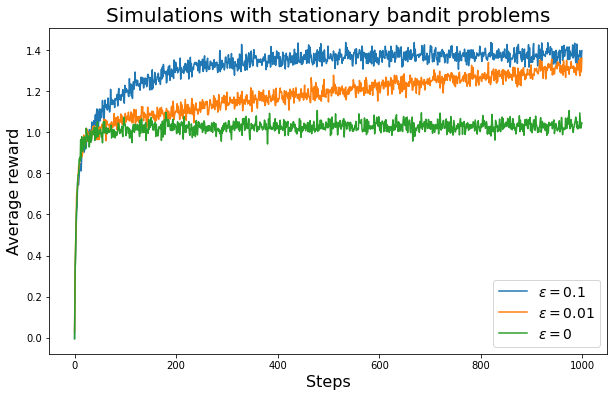

In [7]:
steps = np.arange(len(average_rewards_stationary[0]))
plt.figure(figsize=(10, 6))
plt.plot(steps, average_rewards_stationary[0], label="$\epsilon = 0.1$")
plt.plot(steps, average_rewards_stationary[1], label="$\epsilon = 0.01$")
plt.plot(steps, average_rewards_stationary[2], label="$\epsilon = 0$")
plt.title("Simulations with stationary bandit problems", fontsize=20)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Average reward", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("plot_results_stationary.png", facecolor="white", transparent=False)

# Simulations with nonstationary bandit problems

In [5]:
num_simulations = 2000
num_steps = 10000
num_actions = 10
exploration_probability = 0.1
average_rewards_nonstationary = [
    run_multiple_simulations(num_simulations, num_steps, num_actions, exploration_probability, stationary=False),
    run_multiple_simulations(num_simulations, num_steps, num_actions, exploration_probability,
        stationary=False, constant_step_size=0.1),
]

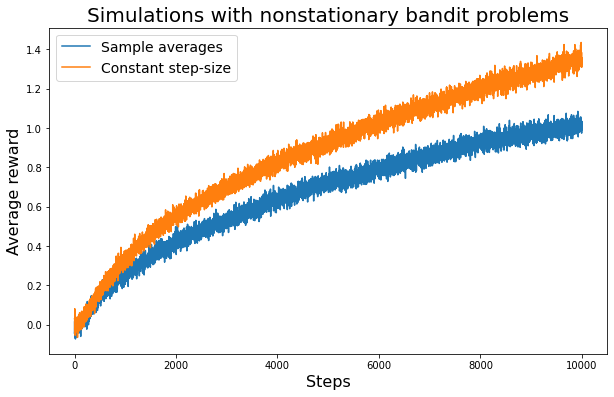

In [6]:
steps = np.arange(num_steps)
plt.figure(figsize=(10, 6))
plt.plot(steps, average_rewards_nonstationary[0], label="Sample averages")
plt.plot(steps, average_rewards_nonstationary[1], label="Constant step-size")
plt.title("Simulations with nonstationary bandit problems", fontsize=20)
plt.xlabel("Steps", fontsize=16)
plt.ylabel("Average reward", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("plot_results_nonstationary.png", facecolor="white", transparent=False)